In [1]:
import torch
from train_dnn_seg import prepare_dataloader

configs = {
    "window_duration": 0.04,
    "window_shift": 0.02,
    "n_frames": 49,
    "n_mels": 26,
    "n_feature": 13,
    "feature_type": "mfcc",
    "learing_rate": 0.001,
    "batch_size": 64,       # 64*10=640
    "p_dropout": 0,
    "model_type": "dnn"
}
device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")

train_loader, dev_loader, eval_loader = prepare_dataloader(configs)
print("Data preparing done")

(3008, 10, 637)
(379, 10, 637)
(330, 10, 637)
train:	3008, 47
dev:	379, 6
eval:	330, 6
Data preparing done


In [42]:
from train_dnn_seg import train
from dnn_model import DNN1

configs["p_dropout"] = 0
model = DNN1(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn1/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.9102, dev acc=0.4169, dev wav acc=0.4380| Model saving...
Epoch-2: train loss=1.5154, dev acc=0.4596, dev wav acc=0.4776| Model saving...
Epoch-3: train loss=1.4278, dev acc=0.4923, dev wav acc=0.5145| Model saving...
Epoch-4: train loss=1.3750, dev acc=0.5032, dev wav acc=0.5198| Model saving...
Epoch-5: train loss=1.3217, dev acc=0.5406, dev wav acc=0.5462| Model saving...
Epoch-6: train loss=1.2838, dev acc=0.5644, dev wav acc=0.6359| Model saving...
Epoch-7: train loss=1.2458, dev acc=0.5493, dev wav acc=0.5858 
Epoch-8: train loss=1.1961, dev acc=0.5665, dev wav acc=0.6253| Model saving...
Epoch-9: train loss=1.1683, dev acc=0.5942, dev wav acc=0.6359| Model saving...
Epoch-10: train loss=1.1458, dev acc=0.5921, dev wav acc=0.6517 
Epoch-11: train loss=1.1284, dev acc=0.5799, dev wav acc=0.6438 
Epoch-12: train loss=1.0998, dev acc=0.5873, dev wav acc=0.6464 
EARLY STOP TRIGGERED


In [43]:
from train_dnn_seg import eval_step
from dnn_model import DNN1

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN1(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4124, wav=0.4485
2-test accurary: segs=0.4642, wav=0.4879
3-test accurary: segs=0.4770, wav=0.5152
4-test accurary: segs=0.4670, wav=0.4939
5-test accurary: segs=0.4588, wav=0.4848
6-test accurary: segs=0.4570, wav=0.4909
7-test accurary: segs=0.4627, wav=0.4848
8-test accurary: segs=0.4712, wav=0.5152
9-test accurary: segs=0.4609, wav=0.4879
10-test accurary: segs=0.4752, wav=0.4970
11-test accurary: segs=0.4530, wav=0.4758
12-test accurary: segs=0.4336, wav=0.4515


In [51]:
from train_dnn_seg import train
from dnn_model import DNN2

model = DNN2(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.001
modelpath = "/data/lujd/algorithm2022/model/seg/dnn2/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.7905, dev acc=0.4689, dev wav acc=0.4934| Model saving...
Epoch-2: train loss=1.5078, dev acc=0.4918, dev wav acc=0.5198| Model saving...
Epoch-3: train loss=1.4018, dev acc=0.5095, dev wav acc=0.5383| Model saving...
Epoch-4: train loss=1.3383, dev acc=0.5375, dev wav acc=0.5594| Model saving...
Epoch-5: train loss=1.2772, dev acc=0.5615, dev wav acc=0.6121| Model saving...
Epoch-6: train loss=1.2199, dev acc=0.5575, dev wav acc=0.5752 
Epoch-7: train loss=1.2193, dev acc=0.5879, dev wav acc=0.6227| Model saving...
Epoch-8: train loss=1.1448, dev acc=0.5657, dev wav acc=0.6121 
Epoch-9: train loss=1.1468, dev acc=0.5892, dev wav acc=0.6491| Model saving...
Epoch-10: train loss=1.0963, dev acc=0.5960, dev wav acc=0.6306| Model saving...
Epoch-11: train loss=1.0884, dev acc=0.5929, dev wav acc=0.6491 
Epoch-12: train loss=1.0482, dev acc=0.5945, dev wav acc=0.6385 
Epoch-13: train loss=1.0352, dev acc=0.5979, dev wav acc=0.6544| Model saving...

In [52]:
from train_dnn_seg import eval_step
from dnn_model import DNN2

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN2(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4403, wav=0.4576
2-test accurary: segs=0.4561, wav=0.4788
3-test accurary: segs=0.4500, wav=0.4939
4-test accurary: segs=0.4400, wav=0.4576
5-test accurary: segs=0.4464, wav=0.4758
6-test accurary: segs=0.4467, wav=0.4697
7-test accurary: segs=0.4342, wav=0.4636
8-test accurary: segs=0.4579, wav=0.4788
9-test accurary: segs=0.4327, wav=0.4545
10-test accurary: segs=0.4536, wav=0.4727
11-test accurary: segs=0.4545, wav=0.4848
12-test accurary: segs=0.4333, wav=0.4545
13-test accurary: segs=0.4688, wav=0.5061
14-test accurary: segs=0.4527, wav=0.4848
15-test accurary: segs=0.4615, wav=0.5030
16-test accurary: segs=0.4409, wav=0.4455
17-test accurary: segs=0.4545, wav=0.4818
18-test accurary: segs=0.4555, wav=0.4788
19-test accurary: segs=0.4348, wav=0.4515
20-test accurary: segs=0.4639, wav=0.4879
21-test accurary: segs=0.4467, wav=0.4606
22-test accurary: segs=0.4636, wav=0.5030
23-test accurary: segs=0.4555, wav=0.4818
24-test accurary: segs=0.4452, wav=0.4818
2

In [53]:
from train_dnn_seg import train
from dnn_model import DNN3

model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn3/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.4218, dev acc=0.5718, dev wav acc=0.5699| Model saving...
Epoch-2: train loss=1.1645, dev acc=0.6245, dev wav acc=0.6913| Model saving...
Epoch-3: train loss=1.0351, dev acc=0.6322, dev wav acc=0.6887| Model saving...
Epoch-4: train loss=0.9644, dev acc=0.6317, dev wav acc=0.6966 
Epoch-5: train loss=0.8990, dev acc=0.6470, dev wav acc=0.7045| Model saving...
Epoch-6: train loss=0.8367, dev acc=0.6591, dev wav acc=0.7335| Model saving...
Epoch-7: train loss=0.8090, dev acc=0.6636, dev wav acc=0.7282| Model saving...
Epoch-8: train loss=0.7755, dev acc=0.6562, dev wav acc=0.7256 
Epoch-9: train loss=0.7279, dev acc=0.6649, dev wav acc=0.7599| Model saving...
Epoch-10: train loss=0.6561, dev acc=0.6858, dev wav acc=0.7599| Model saving...
Epoch-11: train loss=0.6412, dev acc=0.6617, dev wav acc=0.7467 
Epoch-12: train loss=0.5896, dev acc=0.6736, dev wav acc=0.7652 
Epoch-13: train loss=0.5475, dev acc=0.6715, dev wav acc=0.7599 
EARLY STOP TRIG

In [54]:
from train_dnn_seg import eval_step
from dnn_model import DNN3

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4948, wav=0.5212
2-test accurary: segs=0.4630, wav=0.4848
3-test accurary: segs=0.4682, wav=0.4697
4-test accurary: segs=0.4606, wav=0.5121
5-test accurary: segs=0.4521, wav=0.4939
6-test accurary: segs=0.4421, wav=0.4788
7-test accurary: segs=0.4558, wav=0.4727
8-test accurary: segs=0.4764, wav=0.5212
9-test accurary: segs=0.4712, wav=0.5030
10-test accurary: segs=0.4745, wav=0.5273
11-test accurary: segs=0.4827, wav=0.5364
12-test accurary: segs=0.4721, wav=0.5303
13-test accurary: segs=0.4764, wav=0.5455


In [10]:
from train_dnn_seg import train
from dnn_model import DNN3

configs["p_dropout"] = 0.2
model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn3/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.4357, dev acc=0.5636, dev wav acc=0.5937| Model saving...
Epoch-2: train loss=1.2087, dev acc=0.6032, dev wav acc=0.6438| Model saving...
Epoch-3: train loss=1.0982, dev acc=0.6100, dev wav acc=0.6570| Model saving...
Epoch-4: train loss=1.0220, dev acc=0.6340, dev wav acc=0.6992| Model saving...
Epoch-5: train loss=0.9676, dev acc=0.6462, dev wav acc=0.7150| Model saving...
Epoch-6: train loss=0.9157, dev acc=0.6644, dev wav acc=0.7177| Model saving...
Epoch-7: train loss=0.8859, dev acc=0.6565, dev wav acc=0.7045 
Epoch-8: train loss=0.8446, dev acc=0.6578, dev wav acc=0.7124 
Epoch-9: train loss=0.8046, dev acc=0.6615, dev wav acc=0.7361 
EARLY STOP TRIGGERED


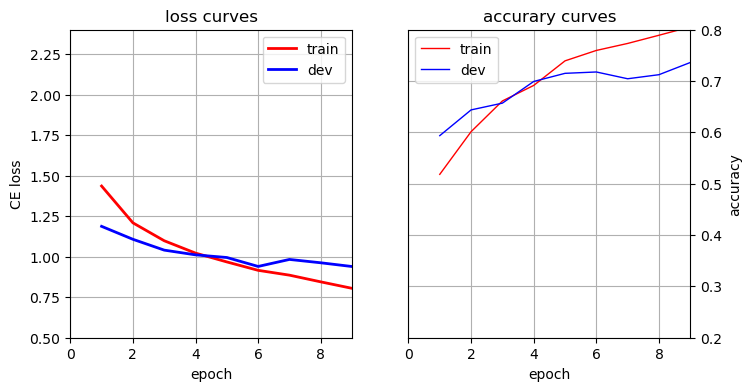

In [13]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [11]:
from train_dnn_seg import eval_step
from dnn_model import DNN3

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4839, wav=0.5182
2-test accurary: segs=0.4394, wav=0.4727
3-test accurary: segs=0.4833, wav=0.5152
4-test accurary: segs=0.4924, wav=0.5242
5-test accurary: segs=0.4894, wav=0.5303
6-test accurary: segs=0.4845, wav=0.5394
7-test accurary: segs=0.4700, wav=0.4970
8-test accurary: segs=0.4655, wav=0.5000
9-test accurary: segs=0.4709, wav=0.5273


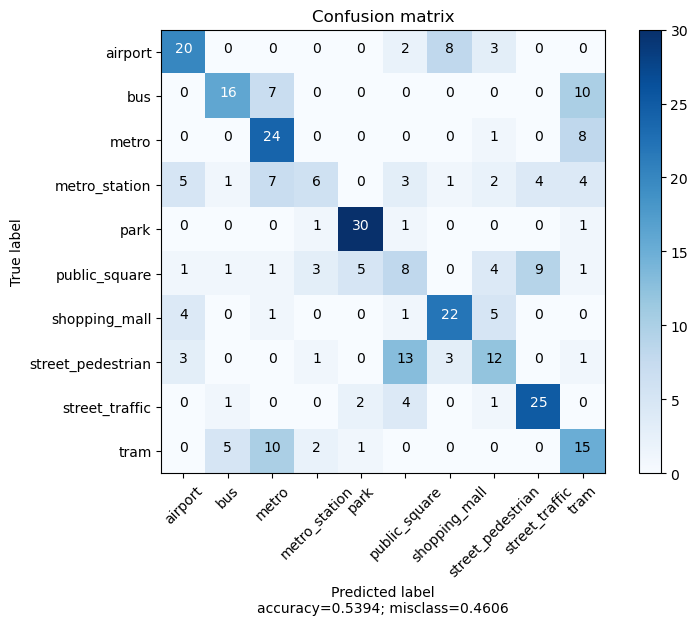

In [15]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 6)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)

In [16]:
import torch
import torch.nn as nn
class DNN4(nn.Module):
    def __init__(self, input_size: int, num_labels: int, p=0):
        super().__init__()
        self.classifier = nn.Sequential(
                                        nn.BatchNorm1d(input_size),
                                        nn.Linear(input_size, 768),
                                        nn.ReLU(True),
                                        nn.Dropout(p=p),

                                        nn.BatchNorm1d(768),
                                        nn.Linear(768, 768),
                                        nn.ReLU(True),
                                        nn.Dropout(p=p),

                                        nn.BatchNorm1d(768),
                                        nn.Linear(768, 128),
                                        nn.ReLU(True),
                                        nn.Dropout(p=p),

                                        nn.Linear(128, num_labels),
                                        )
    def forward(self, input):
        outputs = self.classifier(input)
        return outputs

In [17]:
from train_dnn_seg import train

configs["p_dropout"] = 0
model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn4/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.4222, dev acc=0.5591, dev wav acc=0.6042| Model saving...
Epoch-2: train loss=1.1709, dev acc=0.6121, dev wav acc=0.6517| Model saving...
Epoch-3: train loss=1.0586, dev acc=0.6280, dev wav acc=0.6834| Model saving...
Epoch-4: train loss=0.9741, dev acc=0.6406, dev wav acc=0.6860| Model saving...
Epoch-5: train loss=0.8910, dev acc=0.6617, dev wav acc=0.7150| Model saving...
Epoch-6: train loss=0.8353, dev acc=0.6602, dev wav acc=0.7256 
Epoch-7: train loss=0.7766, dev acc=0.6617, dev wav acc=0.7230 
Epoch-8: train loss=0.7266, dev acc=0.6636, dev wav acc=0.7388| Model saving...
Epoch-9: train loss=0.6713, dev acc=0.6850, dev wav acc=0.7757| Model saving...
Epoch-10: train loss=0.6267, dev acc=0.6757, dev wav acc=0.7599 
Epoch-11: train loss=0.5861, dev acc=0.6855, dev wav acc=0.7599| Model saving...
Epoch-12: train loss=0.5262, dev acc=0.6649, dev wav acc=0.7441 
Epoch-13: train loss=0.5082, dev acc=0.6792, dev wav acc=0.7678 
Epoch-14: train

In [18]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4548, wav=0.4848
2-test accurary: segs=0.4715, wav=0.4909
3-test accurary: segs=0.4745, wav=0.5182
4-test accurary: segs=0.4848, wav=0.5273
5-test accurary: segs=0.4633, wav=0.4879
6-test accurary: segs=0.4648, wav=0.5212
7-test accurary: segs=0.4858, wav=0.5273
8-test accurary: segs=0.4864, wav=0.5333
9-test accurary: segs=0.4664, wav=0.5121
10-test accurary: segs=0.4661, wav=0.5030
11-test accurary: segs=0.4791, wav=0.5242
12-test accurary: segs=0.4773, wav=0.5242
13-test accurary: segs=0.4624, wav=0.4879
14-test accurary: segs=0.4521, wav=0.5121
15-test accurary: segs=0.4818, wav=0.5273
16-test accurary: segs=0.4906, wav=0.5576
17-test accurary: segs=0.4906, wav=0.5424


In [31]:
from train_dnn_seg import train

configs["p_dropout"] = 0.5
model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn4/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.7028, dev acc=0.5248, dev wav acc=0.5620| Model saving...
Epoch-2: train loss=1.4221, dev acc=0.5736, dev wav acc=0.6148| Model saving...
Epoch-3: train loss=1.3176, dev acc=0.5863, dev wav acc=0.6359| Model saving...
Epoch-4: train loss=1.2543, dev acc=0.5976, dev wav acc=0.6253| Model saving...
Epoch-5: train loss=1.2266, dev acc=0.6150, dev wav acc=0.6728| Model saving...
Epoch-6: train loss=1.1842, dev acc=0.6193, dev wav acc=0.6596| Model saving...
Epoch-7: train loss=1.1548, dev acc=0.6367, dev wav acc=0.6887| Model saving...
Epoch-8: train loss=1.1384, dev acc=0.6317, dev wav acc=0.6834 
Epoch-9: train loss=1.1115, dev acc=0.6285, dev wav acc=0.6834 
Epoch-10: train loss=1.0921, dev acc=0.6406, dev wav acc=0.6966| Model saving...
Epoch-11: train loss=1.0664, dev acc=0.6449, dev wav acc=0.6966| Model saving...
Epoch-12: train loss=1.0634, dev acc=0.6264, dev wav acc=0.6913 
Epoch-13: train loss=1.0386, dev acc=0.6485, dev wav acc=0.7098|

In [32]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4530, wav=0.4788
2-test accurary: segs=0.4755, wav=0.5061
3-test accurary: segs=0.4727, wav=0.4788
4-test accurary: segs=0.4903, wav=0.5333
5-test accurary: segs=0.4730, wav=0.4970
6-test accurary: segs=0.4842, wav=0.5000
7-test accurary: segs=0.4715, wav=0.5091
8-test accurary: segs=0.4882, wav=0.4970
9-test accurary: segs=0.4718, wav=0.4939
10-test accurary: segs=0.4776, wav=0.5030
11-test accurary: segs=0.4879, wav=0.5152
12-test accurary: segs=0.4861, wav=0.5273
13-test accurary: segs=0.4809, wav=0.5121
14-test accurary: segs=0.4839, wav=0.4970
15-test accurary: segs=0.4970, wav=0.5485
16-test accurary: segs=0.4909, wav=0.5273
17-test accurary: segs=0.4864, wav=0.5273
18-test accurary: segs=0.4915, wav=0.5303
19-test accurary: segs=0.4706, wav=0.5303
20-test accurary: segs=0.4942, wav=0.5303
21-test accurary: segs=0.4712, wav=0.4818
22-test accurary: segs=0.4964, wav=0.5394
23-test accurary: segs=0.4721, wav=0.4970
24-test accurary: segs=0.4958, wav=0.5394
2

---
best model

In [33]:
from train_dnn_seg import train

configs["p_dropout"] = 0.2
model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn4/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.4894, dev acc=0.5660, dev wav acc=0.5910| Model saving...
Epoch-2: train loss=1.2277, dev acc=0.6127, dev wav acc=0.6491| Model saving...
Epoch-3: train loss=1.1338, dev acc=0.6274, dev wav acc=0.6860| Model saving...
Epoch-4: train loss=1.0692, dev acc=0.6090, dev wav acc=0.6491 
Epoch-5: train loss=1.0045, dev acc=0.6533, dev wav acc=0.7124| Model saving...
Epoch-6: train loss=0.9487, dev acc=0.6427, dev wav acc=0.6939 
Epoch-7: train loss=0.9361, dev acc=0.6475, dev wav acc=0.6887 
Epoch-8: train loss=0.8813, dev acc=0.6522, dev wav acc=0.7124 
Epoch-9: train loss=0.8487, dev acc=0.6707, dev wav acc=0.7520| Model saving...
Epoch-10: train loss=0.8130, dev acc=0.6712, dev wav acc=0.7441| Model saving...
Epoch-11: train loss=0.7924, dev acc=0.6710, dev wav acc=0.7256 
Epoch-12: train loss=0.7543, dev acc=0.6828, dev wav acc=0.7652| Model saving...
Epoch-13: train loss=0.7292, dev acc=0.6778, dev wav acc=0.7520 
Epoch-14: train loss=0.6870, de

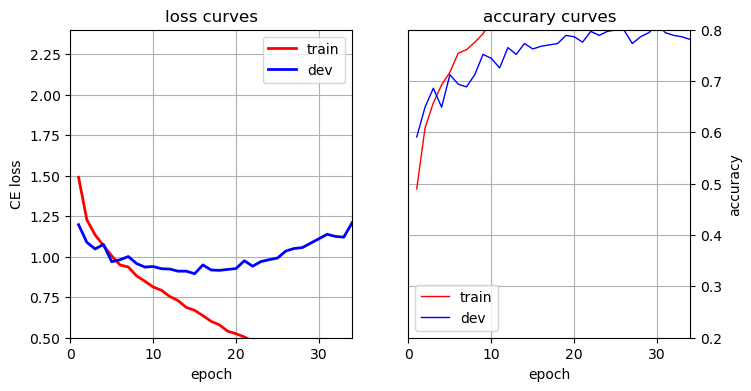

In [38]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [34]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4873, wav=0.5303
2-test accurary: segs=0.4933, wav=0.5273
3-test accurary: segs=0.4867, wav=0.5364
4-test accurary: segs=0.4991, wav=0.5394
5-test accurary: segs=0.4721, wav=0.4909
6-test accurary: segs=0.4858, wav=0.5273
7-test accurary: segs=0.4645, wav=0.5000
8-test accurary: segs=0.4882, wav=0.5152
9-test accurary: segs=0.4736, wav=0.5182
10-test accurary: segs=0.4897, wav=0.5303
11-test accurary: segs=0.4770, wav=0.5212
12-test accurary: segs=0.4821, wav=0.5242
13-test accurary: segs=0.4791, wav=0.5273
14-test accurary: segs=0.4827, wav=0.5212
15-test accurary: segs=0.4758, wav=0.5182
16-test accurary: segs=0.4900, wav=0.5424
17-test accurary: segs=0.4791, wav=0.5242
18-test accurary: segs=0.4794, wav=0.5121
19-test accurary: segs=0.4761, wav=0.5212
20-test accurary: segs=0.4685, wav=0.5303
21-test accurary: segs=0.4894, wav=0.5485
22-test accurary: segs=0.4748, wav=0.5333
23-test accurary: segs=0.4885, wav=0.5424
24-test accurary: segs=0.4855, wav=0.5424
2

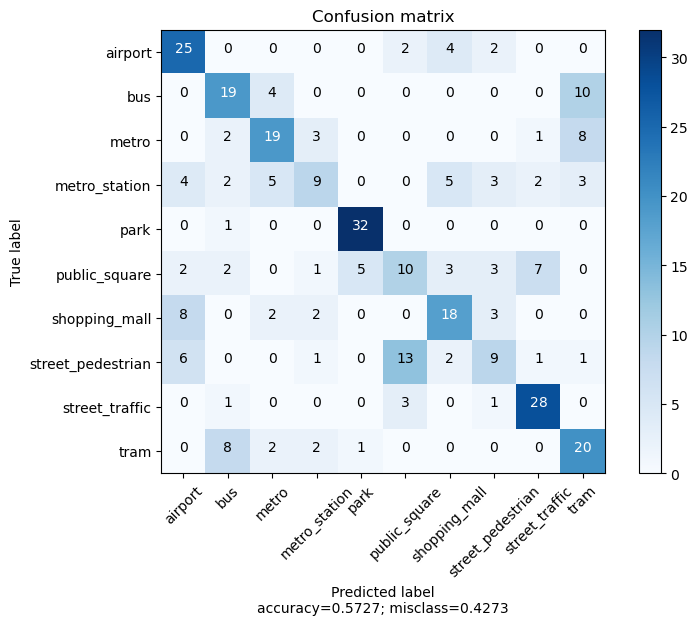

In [37]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 32)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)

In [25]:
from train_dnn_seg import train

configs["p_dropout"] = 0
model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg/dnn4_new/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.4177, dev acc=0.5704, dev wav acc=0.6253| Model saving...
Epoch-2: train loss=1.1361, dev acc=0.6047, dev wav acc=0.6332| Model saving...
Epoch-3: train loss=1.0431, dev acc=0.6372, dev wav acc=0.7045| Model saving...
Epoch-4: train loss=0.9527, dev acc=0.6359, dev wav acc=0.6966 
Epoch-5: train loss=0.8965, dev acc=0.6499, dev wav acc=0.7282| Model saving...
Epoch-6: train loss=0.8245, dev acc=0.6657, dev wav acc=0.7361| Model saving...
Epoch-7: train loss=0.7675, dev acc=0.6604, dev wav acc=0.7203 
Epoch-8: train loss=0.7235, dev acc=0.6470, dev wav acc=0.6992 
Epoch-9: train loss=0.6646, dev acc=0.6763, dev wav acc=0.7520| Model saving...
Epoch-10: train loss=0.6054, dev acc=0.6675, dev wav acc=0.7493 
Epoch-11: train loss=0.5692, dev acc=0.6828, dev wav acc=0.7678| Model saving...
Epoch-12: train loss=0.5305, dev acc=0.6760, dev wav acc=0.7810 
Epoch-13: train loss=0.4920, dev acc=0.6768, dev wav acc=0.7784 
Epoch-14: train loss=0.4381, de

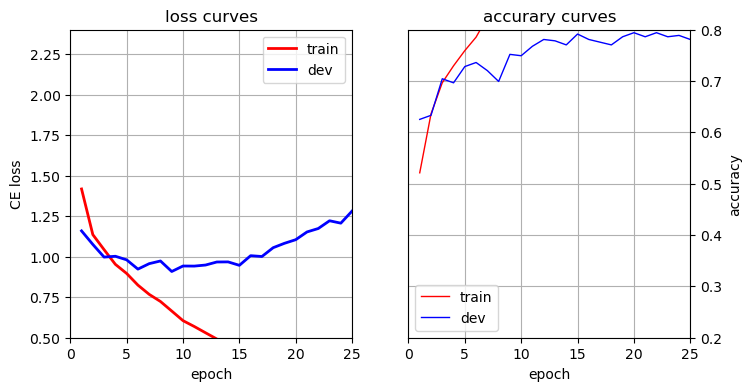

In [27]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [26]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4530, wav=0.4818
2-test accurary: segs=0.4518, wav=0.4758
3-test accurary: segs=0.5036, wav=0.5394
4-test accurary: segs=0.4718, wav=0.5121
5-test accurary: segs=0.4836, wav=0.5303
6-test accurary: segs=0.4797, wav=0.5303
7-test accurary: segs=0.4764, wav=0.5212
8-test accurary: segs=0.4776, wav=0.5333
9-test accurary: segs=0.4639, wav=0.5152
10-test accurary: segs=0.4748, wav=0.5182
11-test accurary: segs=0.4964, wav=0.5212
12-test accurary: segs=0.4615, wav=0.5121
13-test accurary: segs=0.4679, wav=0.5242
14-test accurary: segs=0.4761, wav=0.5364
15-test accurary: segs=0.4876, wav=0.5485
16-test accurary: segs=0.4661, wav=0.5303
17-test accurary: segs=0.4836, wav=0.5303
18-test accurary: segs=0.4712, wav=0.5485
19-test accurary: segs=0.4855, wav=0.5636
20-test accurary: segs=0.4606, wav=0.5152
21-test accurary: segs=0.4712, wav=0.5545
22-test accurary: segs=0.4952, wav=0.5636
23-test accurary: segs=0.4721, wav=0.5333
24-test accurary: segs=0.4576, wav=0.4939
2

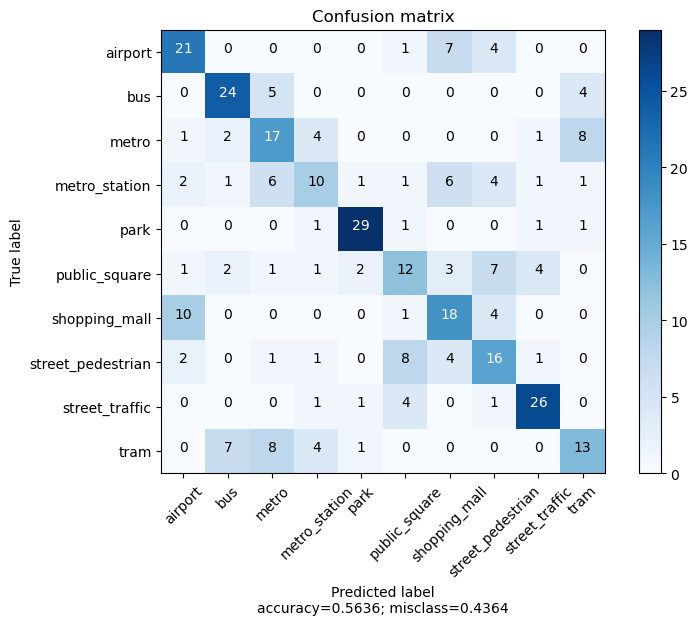

In [30]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 22)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)